# Grafos de Palabras
Demos las herramientas básicas para armar un grafo de palabras a través de un conjunto de textos

In [ ]:
import pandas as pd
import networkx as nx # Una de los paquetes más usados para trabajar con redes
import matplotlib.pylab as plt
import numpy as np
from google.colab import drive
from gensim.utils import tokenize
import random as rm

seguimos trabajado con tangos

In [ ]:
drive.mount('/content/gdrive')

path = 'gdrive/MyDrive/LaboDatos2022/'
nombre_archivo = 'todo_tangos.csv'
d_tangos = pd.read_csv(path + nombre_archivo) # Si quieren el script para bajar los datos, lo piden.
d_tangos.dropna(subset = ['letra'],
                inplace = True)
d_tangos.head()

Mounted at /content/gdrive


,url,titulo,ritmo,autor_letra,autor_musica,letra,ano
0,https://www.todotango.com/musica/tema/130/A-ba...,A bailar,Tango,Homero Expósito,Domingo Federico,¡A bailar a bailar que la orquesta se va! Sobr...,1943.0
1,https://www.todotango.com/musica/tema/7866/A-b...,A bailar el tango,Tango,Leopoldo Díaz Vélez,Leopoldo Díaz Vélez,Este tango nació para bailarse y así hamacarse...,1962.0
2,https://www.todotango.com/musica/tema/3647/A-B...,A Beba Bidart,Poemalunfardo,Alberto Uemura,NaN,Nació en la calle Quito entre Boedo y Colombre...,NaN
3,https://www.todotango.com/musica/tema/2864/A-b...,A bordo de mis zapatos,Milonga,Eugenio Majul,César Isella,Caminé todas las calles de Buenos Aires y es c...,NaN
4,https://www.todotango.com/musica/tema/3843/A-B...,A Buenos Aires,Milonga,Edmundo Rivero,Edmundo Rivero,En tu baraje gringo ciudad mía vas perdiendo t...,NaN


Teniendo en cuenta que queremos enlazar palabras sucesivas, no nos interesan signos de puntuación, espacios ni nada que no sea palabras, así que filtramos y tokenizamos. Nos sirve bastante tener a los textos como listas de palabras.

In [ ]:
d_tangos['letra_procesada'] = d_tangos['letra'].apply(lambda letra: list(tokenize(letra.lower())
                                                                )
                                                 ) # Procesamos de forma tal de tener a cada letra en formato lista de palabras

In [ ]:
d_tangos['letra_procesada'].values[0]

['a',
 'bailar',
 'a',
 'bailar',
 'que',
 'la',
 'orquesta',
 'se',
 'va',
 'sobre',
 'el',
 'fino',
 'garabato',
 'de',
 'un',
 'tango',
 'nervioso',
 'y',
 'lerdo',
 'se',
 'irá',
 'borrando',
 'el',
 'recuerdo',
 'a',
 'bailar',
 'a',
 'bailar',
 'que',
 'la',
 'orquesta',
 'se',
 'va',
 'el',
 'último',
 'tango',
 'perfuma',
 'la',
 'noche',
 'un',
 'tango',
 'dulce',
 'que',
 'dice',
 'adiós',
 'la',
 'frase',
 'callada',
 'se',
 'asoma',
 'a',
 'los',
 'labios',
 'y',
 'canta',
 'el',
 'tango',
 'la',
 'despedida',
 'vamos',
 'a',
 'bailar',
 'tal',
 'vez',
 'no',
 'vuelvas',
 'a',
 'verla',
 'nunca',
 'y',
 'el',
 'último',
 'tango',
 'perfuma',
 'la',
 'noche',
 'y',
 'este',
 'es',
 'el',
 'tango',
 'que',
 'dice',
 'el',
 'adiós',
 'a',
 'bailar',
 'a',
 'bailar',
 'que',
 'la',
 'orquesta',
 'se',
 'va',
 'quedará',
 'el',
 'salón',
 'vacío',
 'con',
 'un',
 'montón',
 'de',
 'esperanzas',
 'que',
 'irán',
 'camino',
 'al',
 'olvido',
 'a',
 'bailar',
 'a',
 'bailar',
 'que

Ahora, los enlaces los podemos pensar a partir de unir palabras que aparecen en el lujar i, i + 1 de una lista

In [ ]:
# Así podemos pensar en la construcción de los enlaces, dado un único tango
e = [(i,j,1) for i,j in zip(d_tangos.letra_procesada.values[0][:-1], d_tangos.letra_procesada.values[0][1:])]
print(e[:20])

[('a', 'bailar', 1), ('bailar', 'a', 1), ('a', 'bailar', 1), ('bailar', 'que', 1), ('que', 'la', 1), ('la', 'orquesta', 1), ('orquesta', 'se', 1), ('se', 'va', 1), ('va', 'sobre', 1), ('sobre', 'el', 1), ('el', 'fino', 1), ('fino', 'garabato', 1), ('garabato', 'de', 1), ('de', 'un', 1), ('un', 'tango', 1), ('tango', 'nervioso', 1), ('nervioso', 'y', 1), ('y', 'lerdo', 1), ('lerdo', 'se', 1), ('se', 'irá', 1)]


In [ ]:
def armado_red(letras):
    enlaces = {}
    for letra in letras:
        for i,j in zip(letra[:-1], letra[1:]):
            if (i,j) not in enlaces.keys():
                enlaces[(i,j)] = 1
            else:
                enlaces[(i,j)] += 1
    enlaces = [(i,j,v) for (i,j),v in enlaces.items()]
    G = nx.DiGraph()
    G.add_weighted_edges_from(enlaces)

    return G


Por ejemplo, para una sola letra tendremos:

In [ ]:
letra = d_tangos[d_tangos.titulo == 'Sur'].letra_procesada.to_list()
G_letra = armado_red(letra)
print(f'La red tiene {G_letra.number_of_nodes()} palabras distintas, y {G_letra.number_of_edges()} enlaces entre las mismas')

La red tiene 102 palabras distintas, y 155 enlaces entre las mismas


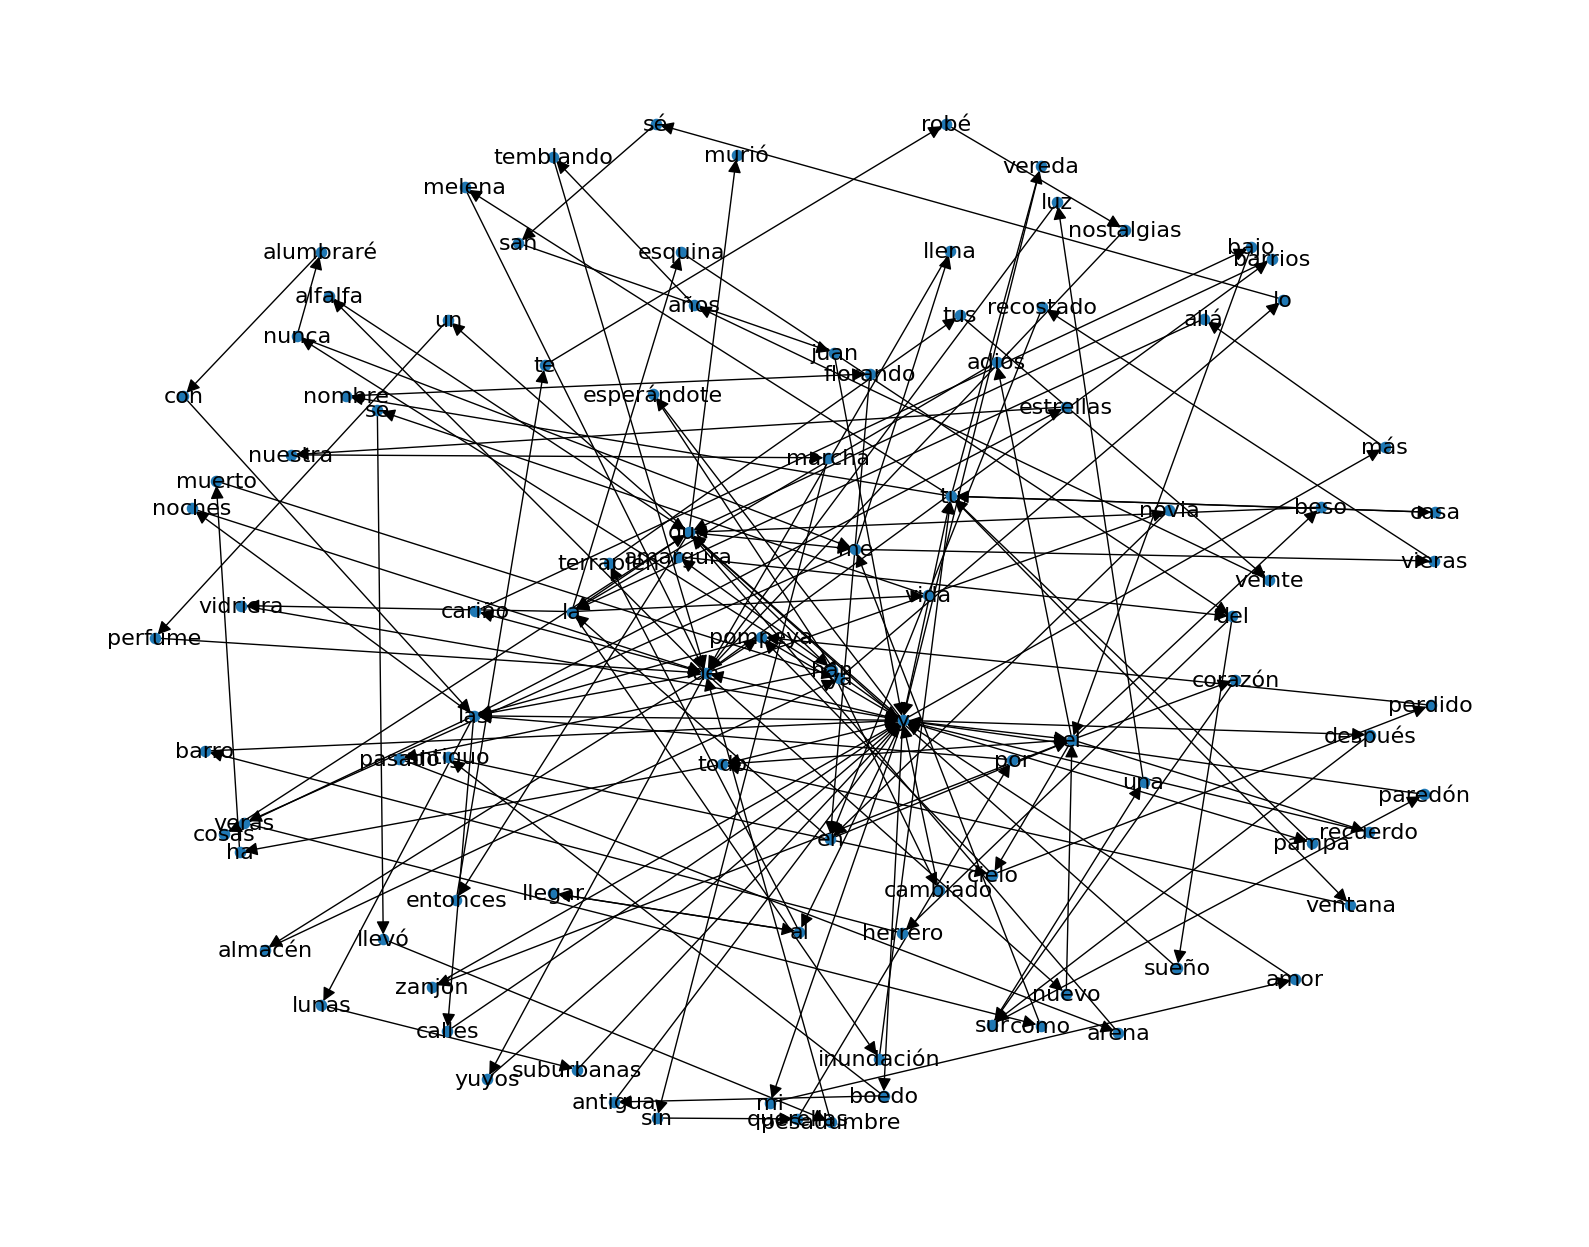

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 200)
nx.draw_networkx(G_letra, node_size = 10, ax = ax, pos = nx.spring_layout(G_letra, k = 0.75), font_size =  8, font_color = 'k', width = 0.5)
ax.axis('off')
plt.show()

Con la función anterior, generamos un grafo pesado (según cuántas veces ocurre un enlace) y dirigido (según la dirección en la aparición de las palabras en el texto)

In [ ]:
letras = d_tangos[d_tangos.autor_letra == 'Homero Manzi'].letra_procesada.to_list()
G_letras = armado_red(letras)

print(f'La red tiene {G_letras.number_of_nodes()} palabras distintas, y {G_letras.number_of_edges()} enlaces entre las mismas')

La red tiene 3398 palabras distintas, y 11354 enlaces entre las mismas


Usemos la información de la red (direccionalidad y peso) para crear una letra aleatoria. Para esto, empezamos con una palabra random y elegimos la siguiente de forma proporcional al peso que la une con sus palabras vecinas.

In [ ]:
palabras = list(G_letras.nodes())
p1 = rm.sample(palabras, 1)[0]

letra_random = [p1]

p2 = rm.sample([i for i,j in G_letras[p1].items() for c in range(j['weight'])], 1)[0]
letra_random.append(p2)

print('\n'.join(letra_random))

frisón
tostao


Armemos una función que haga esto n veces

In [ ]:
def letra_random(G, largo_letra = 20, p1 = None):
    palabras = list(G.nodes())
    if not p1:
        p1 = rm.sample(palabras, 1)[0]

    letra_random = [p1]

    for k in range(largo_letra):

        p2 = rm.sample([i for i,j in G_letras[p1].items() for c in range(j['weight'])], 1)[0]
        letra_random.append(p2)
        p1 = p2
    return letra_random

Ahora, podemos generar letras aleatorias a partir de la red

In [ ]:
print('\n'.join(letra_random(G_letras, )))

sangró
de
nuevo
y
sabe
que
fue
también
dormirá
la
ruina
te
voy
a
los
doctor
ellos
me
quiso
y
entre
